In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)
import numpy as np
import colorcet as cc

import sys
sys.path.insert(0, '/home/was966/Research/mims-compass/')
from compass.tokenizer import CONCEPT_palette

#CONCEPT_palette.pop('CANCER')

hue_order = CONCEPT_palette.keys()
hue_color = CONCEPT_palette.values()

In [2]:
hue_order

dict_keys(['Bcell_general', 'Memory_Bcell', 'Naive_Bcell', 'Plasma_cell', 'CD4_Tcell', 'CD8_Tcell', 'Memory_Tcell', 'Naive_Tcell', 'Tcell_general', 'Cytotoxic_Tcell', 'Exhausted_Tcell', 'Immune_checkpoint', 'Treg', 'NKcell', 'Innate_lymphoid_cell', 'cDC', 'pDC', 'Macrophage', 'Monocyte', 'Myeloid', 'Granulocyte', 'Mast', 'Erythrocyte', 'Platelet', 'Stem', 'Stroma', 'Pericyte', 'Fibroblast', 'Endothelial', 'Epithelial', 'Mesothelial', 'Adipocyte', 'Hepatocyte', 'Pancreatic', 'Pneumocyte', 'Apoptosis_pathway', 'IFNg_pathway', 'TGFb_pathway', 'Cytokine', 'TLS', 'Cell_proliferation', 'Genome_integrity', 'Reference', 'CANCER'])

In [3]:
from scipy.stats import zscore


In [4]:
dfs_tcga = pd.read_csv('../01_extract_readout/TCGA/02_readouts_celltype.csv', index_col = 0)
dfl_tcga = pd.read_csv('../01_extract_readout//TCGA/00_clinical_label_orignal.csv', index_col=0)
dfl_tcga['domain'] = 'TCGA'

tcga = dfl_tcga[['cancer_type', 'domain']].join(dfs_tcga)
tcga['cancer_type'] = tcga['cancer_type'].apply(lambda x:x.split('-')[1])

dfs_itrp = pd.read_csv('../01_extract_readout/ITRP/02_readouts_celltype.csv', index_col = 0)
dfl_itrp = pd.read_csv('../01_extract_readout//ITRP/00_clinical_label.csv', index_col=0)
dfl_itrp['domain'] = 'ITRP'

itrp = dfl_itrp[['cancer_type', 'domain']].join(dfs_itrp)

In [5]:
dfs = tcga._append(itrp)

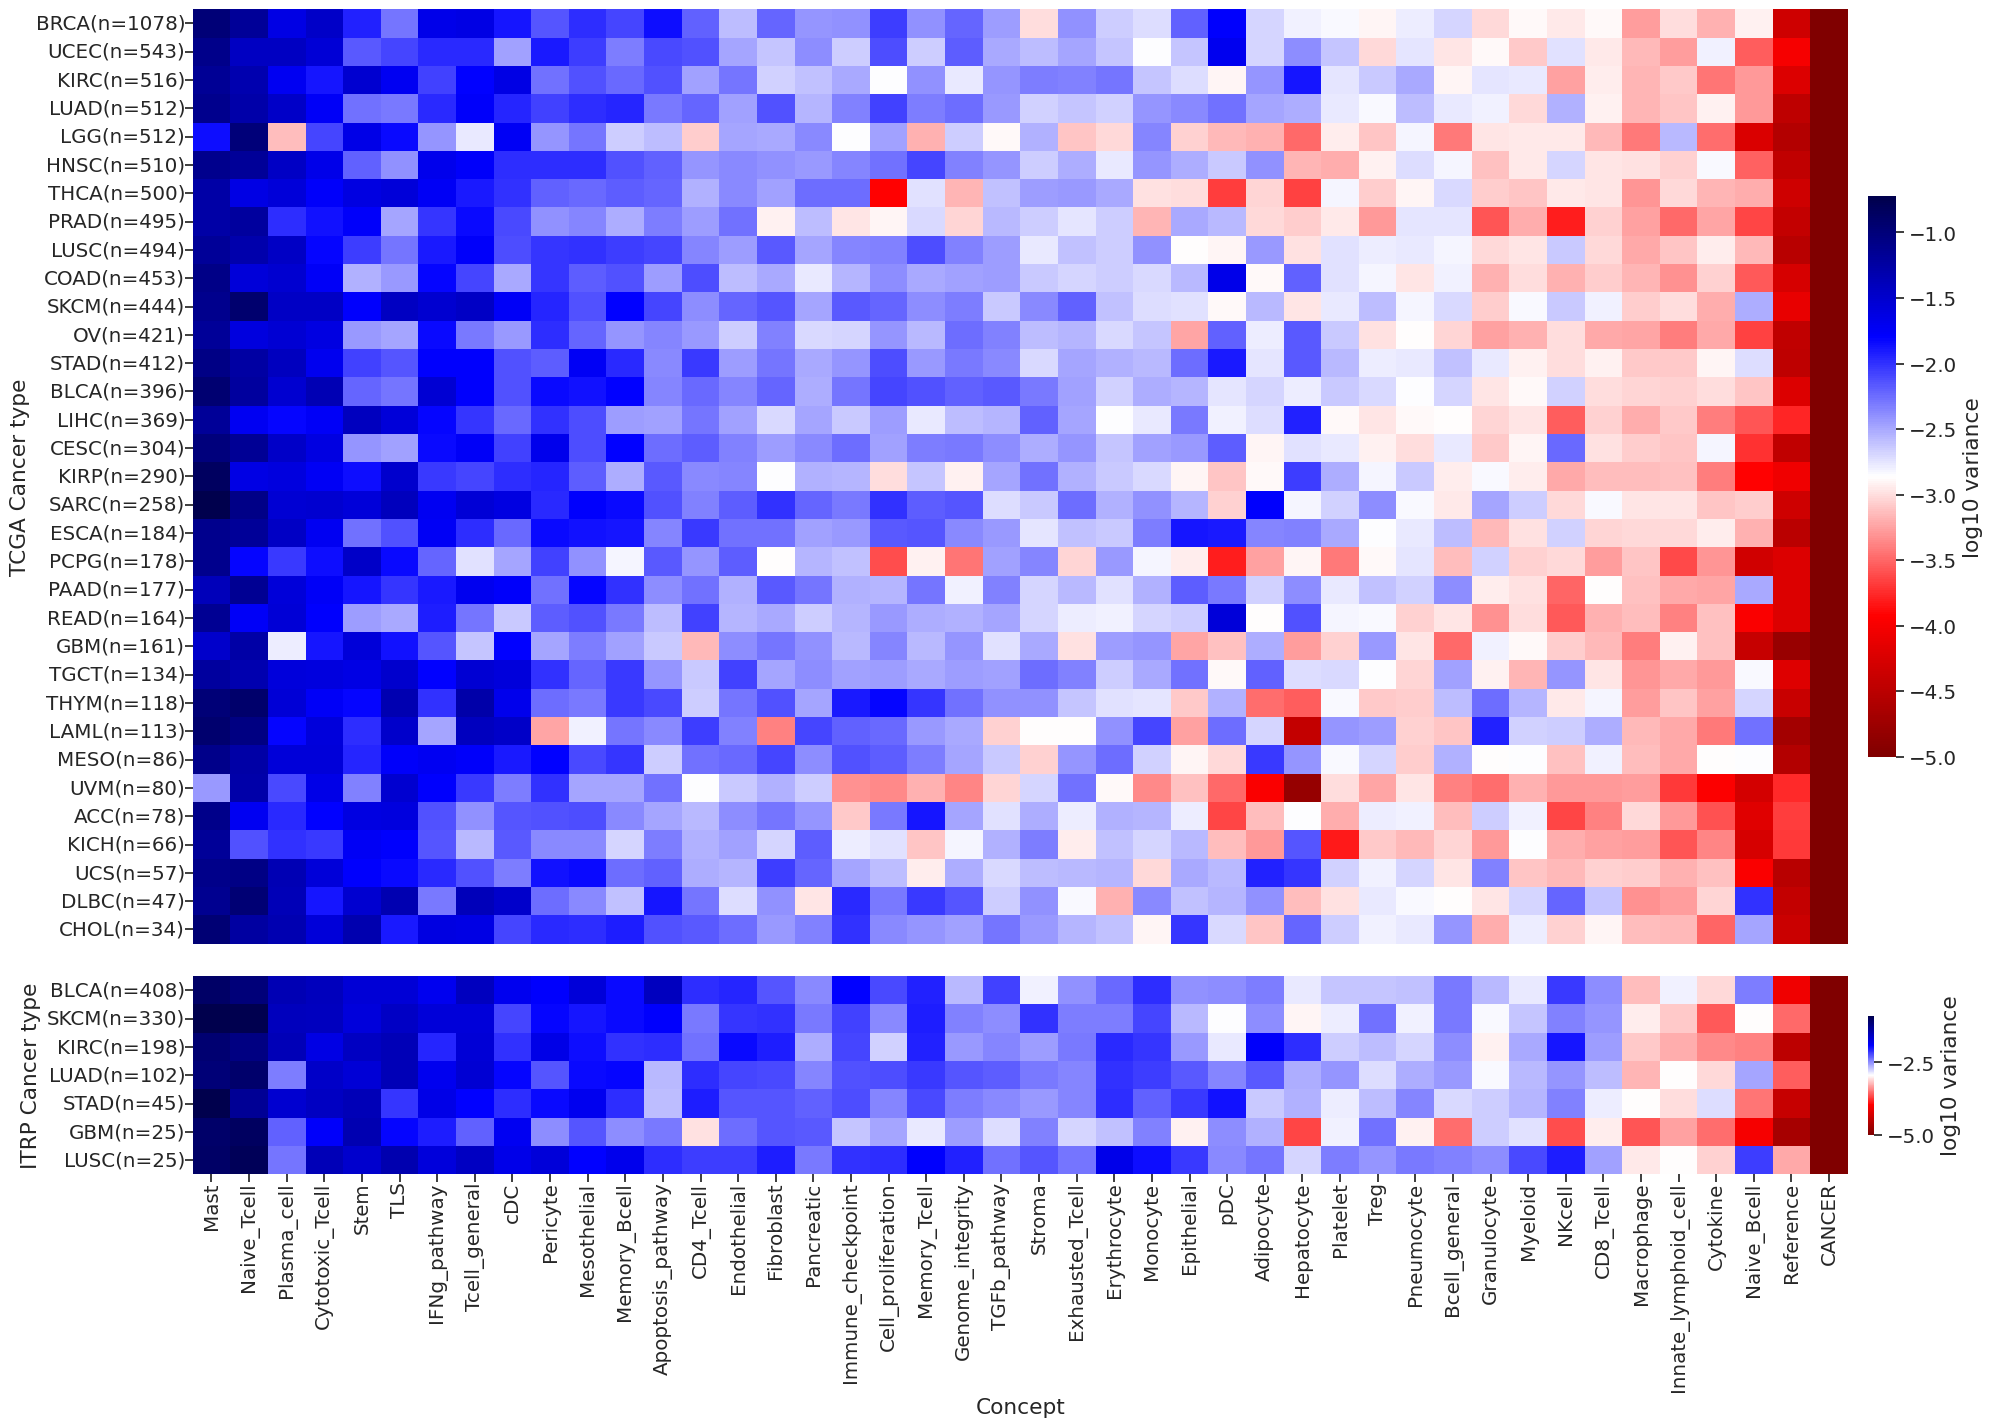

In [21]:
tcga_var = dfs[dfs.domain == 'TCGA'].groupby('cancer_type')[list(hue_order)].var()
tcga_mean = dfs[dfs.domain == 'TCGA'].groupby('cancer_type')[list(hue_order)].mean()

size = dfs[dfs.domain == 'TCGA'].groupby('cancer_type').size().sort_values(ascending=False)
size = size.index + "(n=" + size.astype(str) + ")"
tcga_log2var = np.log10(tcga_var)

x_order = tcga_log2var.mean().sort_values(ascending=False).index

tcga_log2var.index = tcga_log2var.index.map(size)


y_order = size.tolist() #tcga_log2var.T.mean().sort_values(ascending=False).index


tcga_log2var = tcga_log2var[x_order].loc[y_order]



itrp_var = dfs[dfs.domain == 'ITRP'].groupby('cancer_type')[list(hue_order)].var()

size1 = dfs[dfs.domain == 'ITRP'].groupby('cancer_type').size().sort_values(ascending=False)
size1 = size1.index + "(n=" + size1.astype(str) + ")"
itrp_log2var = np.log10(itrp_var)

x_order1 = x_order
y_order1 = size1.values

itrp_log2var.index = itrp_log2var.index.map(size1)
itrp_log2var = itrp_log2var[x_order].loc[y_order1]


fig, axes = plt.subplots(figsize=(22, 12 + (12/33) * 7), sharex=True, nrows = 2, height_ratios = [33, 7])

ax, ax1 = axes

sns.heatmap(tcga_log2var, ax=ax, cmap='seismic_r', cbar_kws={'shrink': 0.6, 'pad':0.01,'label': 'log10 variance'}, vmin = -5)
ax.set_ylabel('TCGA Cancer type')
ax.tick_params(left='off',  labelleft='on',  pad=-.6)

sns.heatmap(itrp_log2var, ax=ax1, cmap='seismic_r', cbar_kws={'shrink': 0.6, 'pad':0.01,'label': 'log10 variance'}, vmin = -5)

ax1.set_xlabel('Concept')
ax1.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6)
ax1.set_ylabel('ITRP Cancer type')

fig.tight_layout(h_pad = 1.5)
fig.savefig('Score_TCGA_ITRP_Cell_concept_var.pdf', bbox_inches ='tight')
fig.savefig('Score_TCGA_ITRP_Cell_concept_var.svg', bbox_inches ='tight')

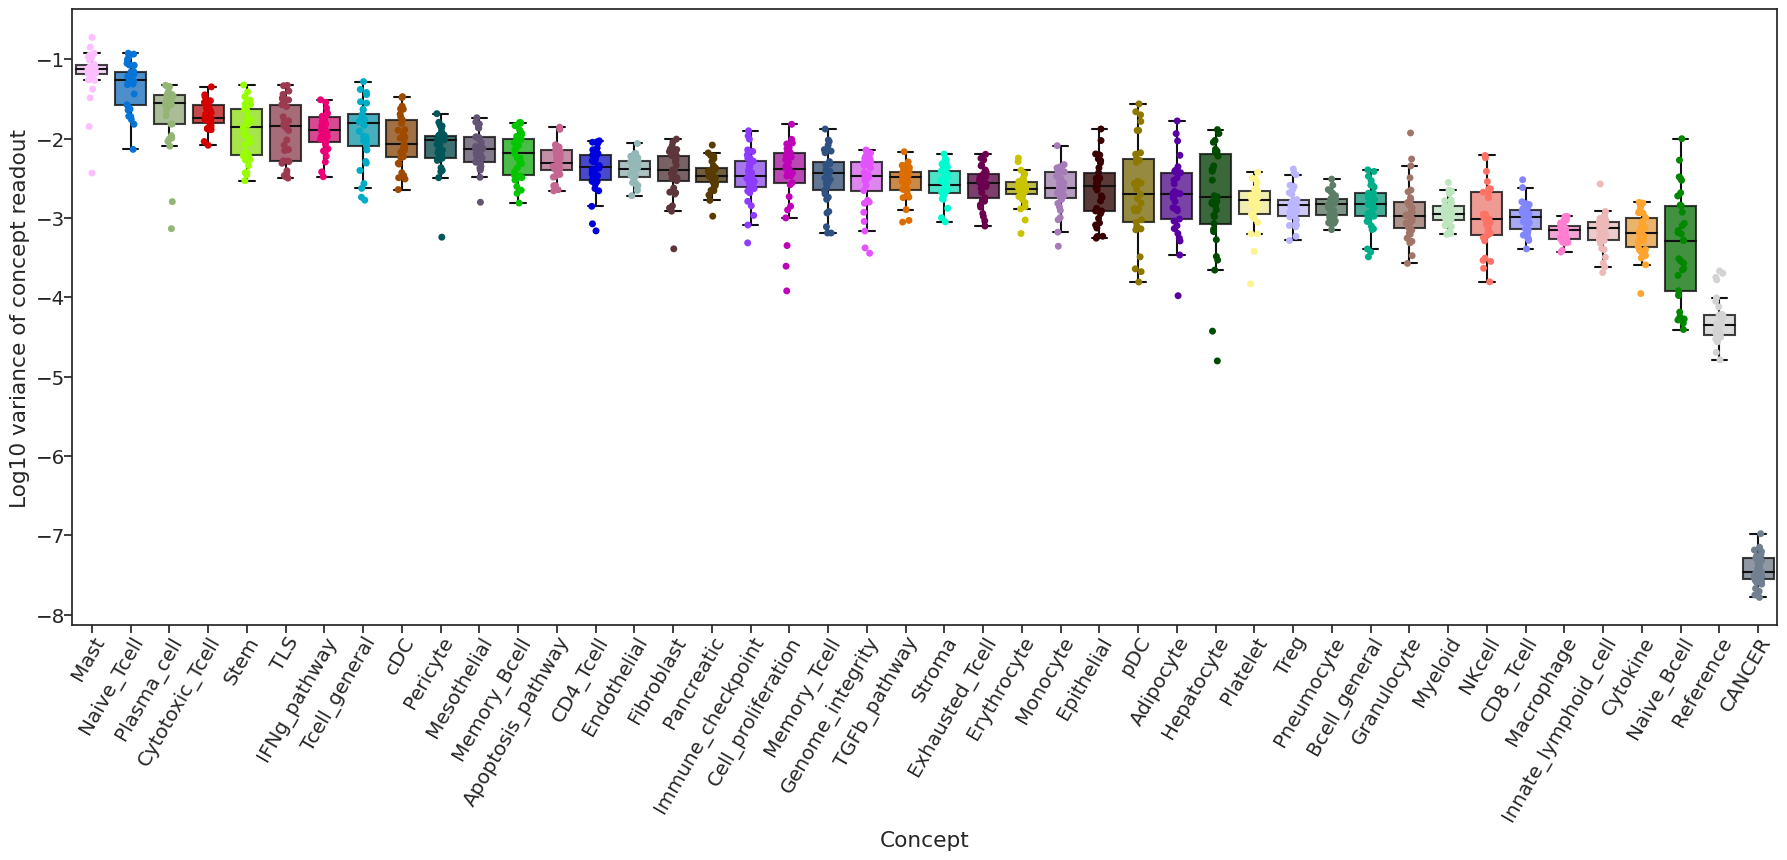

In [7]:
data = tcga_log2var.unstack().reset_index()
data.columns = ['Concept', 'cancer_type', 'log10_var']

fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(data, x = 'Concept', y = 'log10_var', fliersize = 0, order = x_order,  palette=pd.Index(x_order).map(CONCEPT_palette).tolist(), boxprops={'alpha':0.8})
sns.stripplot(data, x = 'Concept', y = 'log10_var', order = x_order,  palette = pd.Index(x_order).map(CONCEPT_palette).tolist(), size = 5, edgecolor='k') #, hue = 'cancer_type'

ax.set_ylabel('Log10 variance of concept readout')
ax.set_xlabel('Concept')
ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
ax.set_xticklabels(x_order, 
                    rotation=60, 
                    ha="right",  
                    rotation_mode="anchor")  # <====== HERE is the ke

fig.savefig('Score_TCGA_Cell_concept_var_boxplot.pdf' ,bbox_inches ='tight')

In [8]:
cancer_colors = sns.color_palette(cc.glasbey, n_colors= len(size))
cancer_color_map = dict(zip(size.tolist(), cancer_colors))

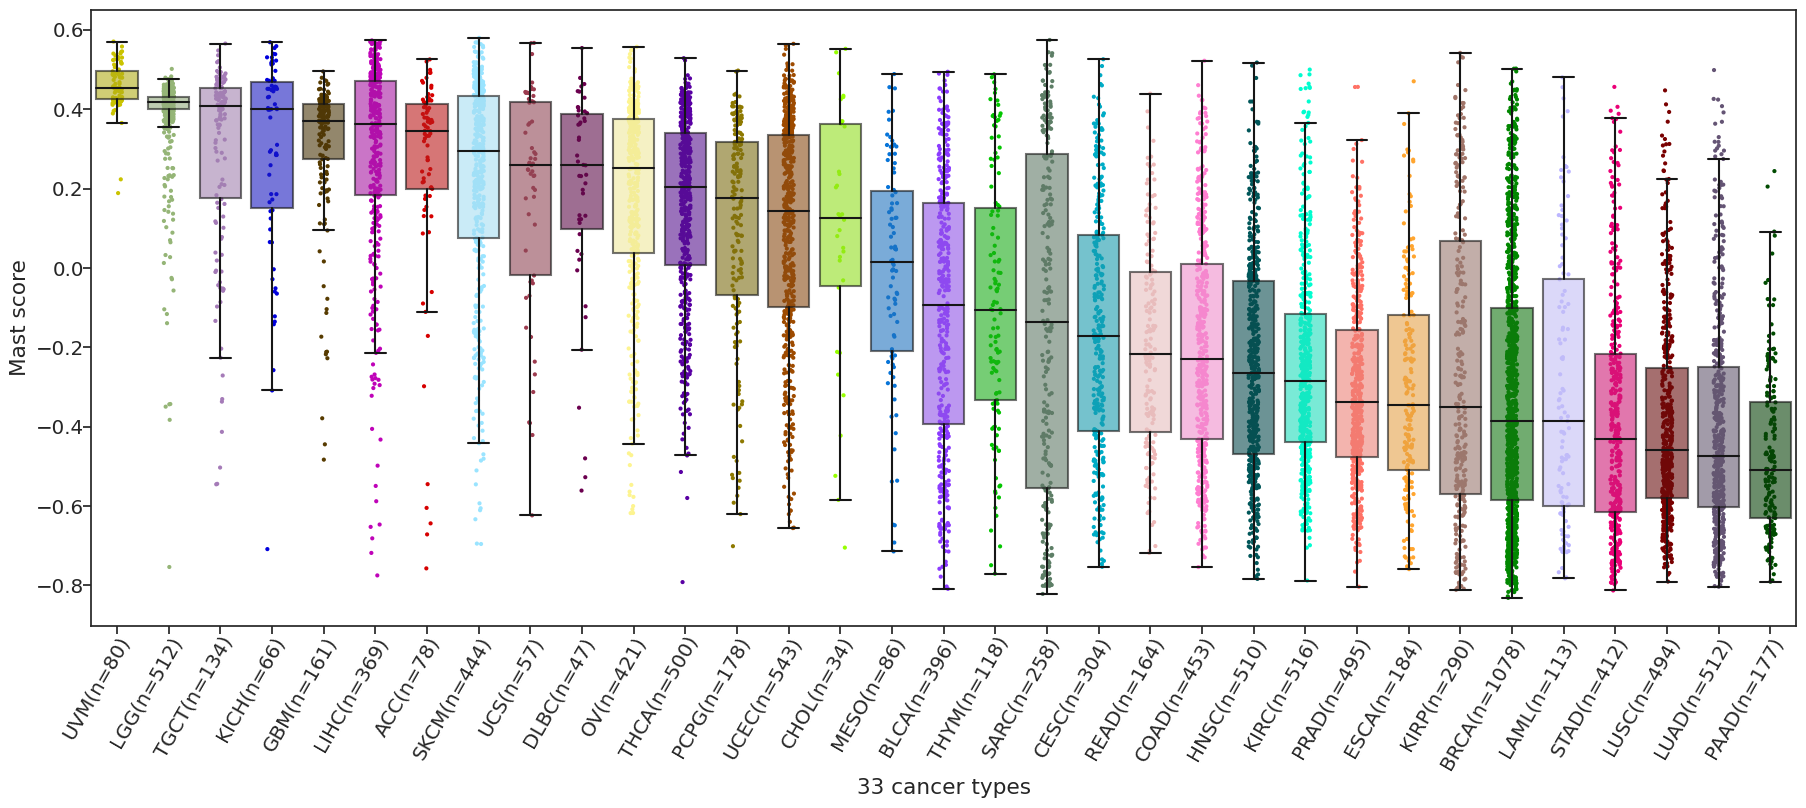

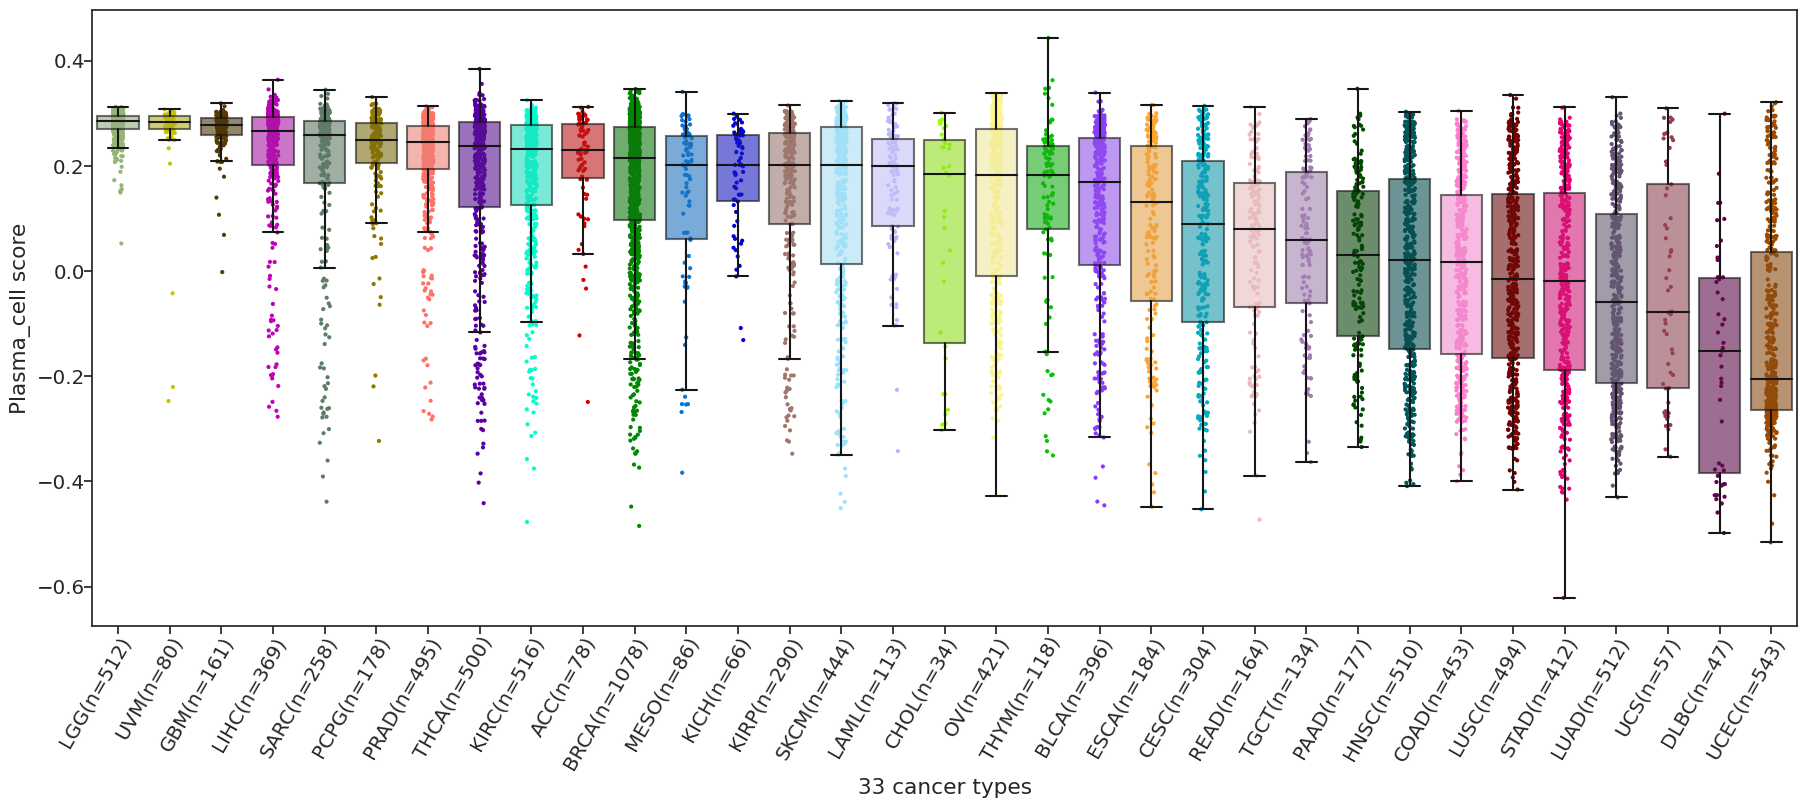

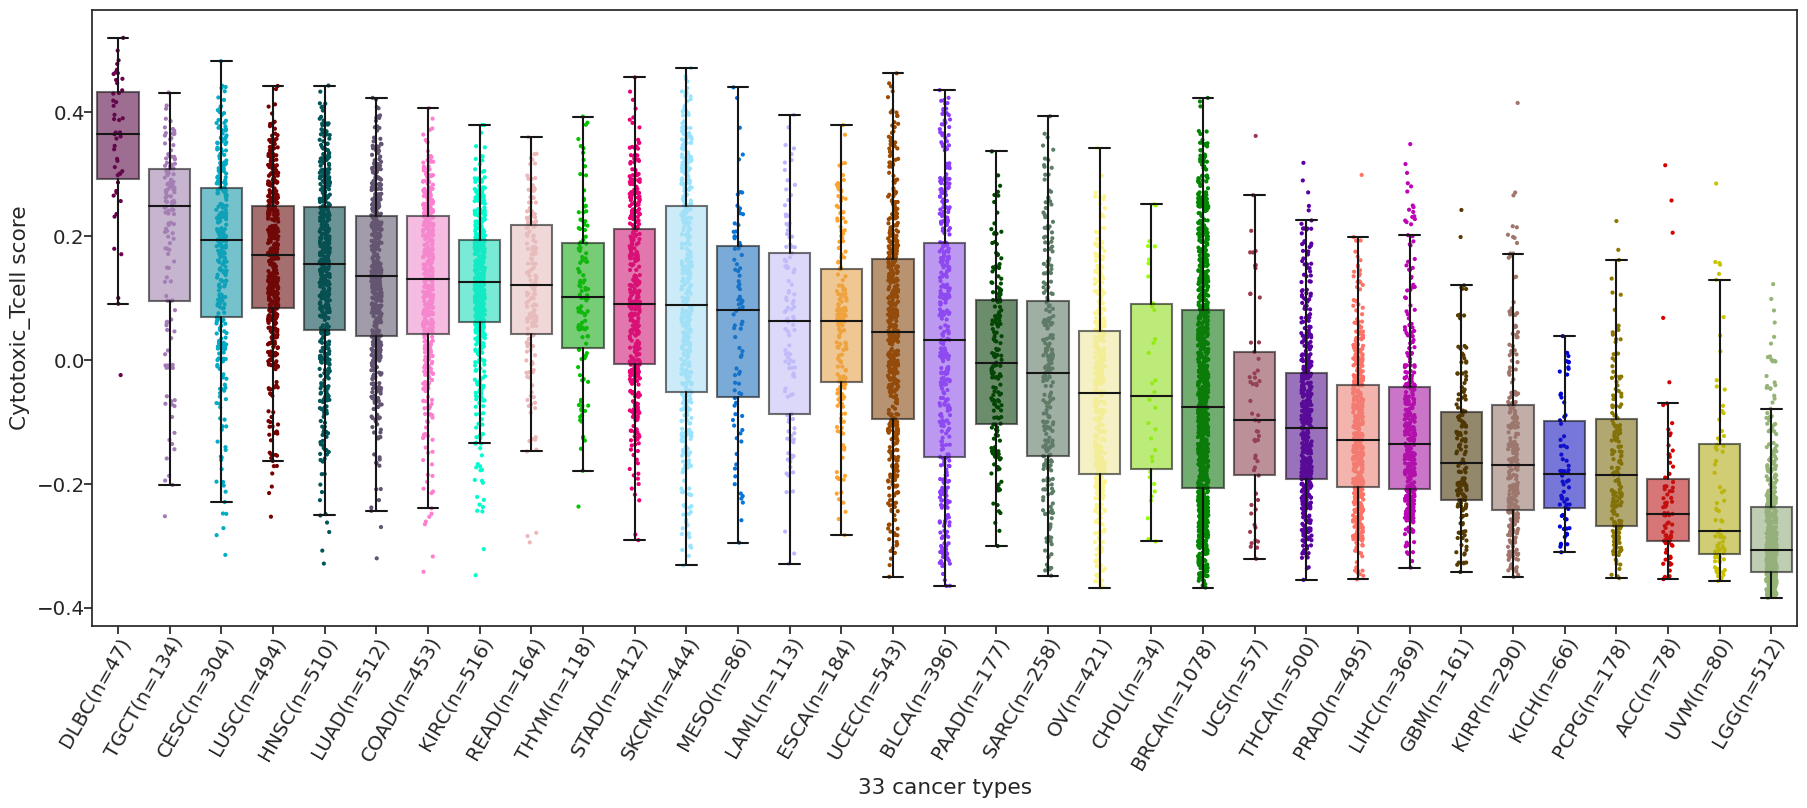

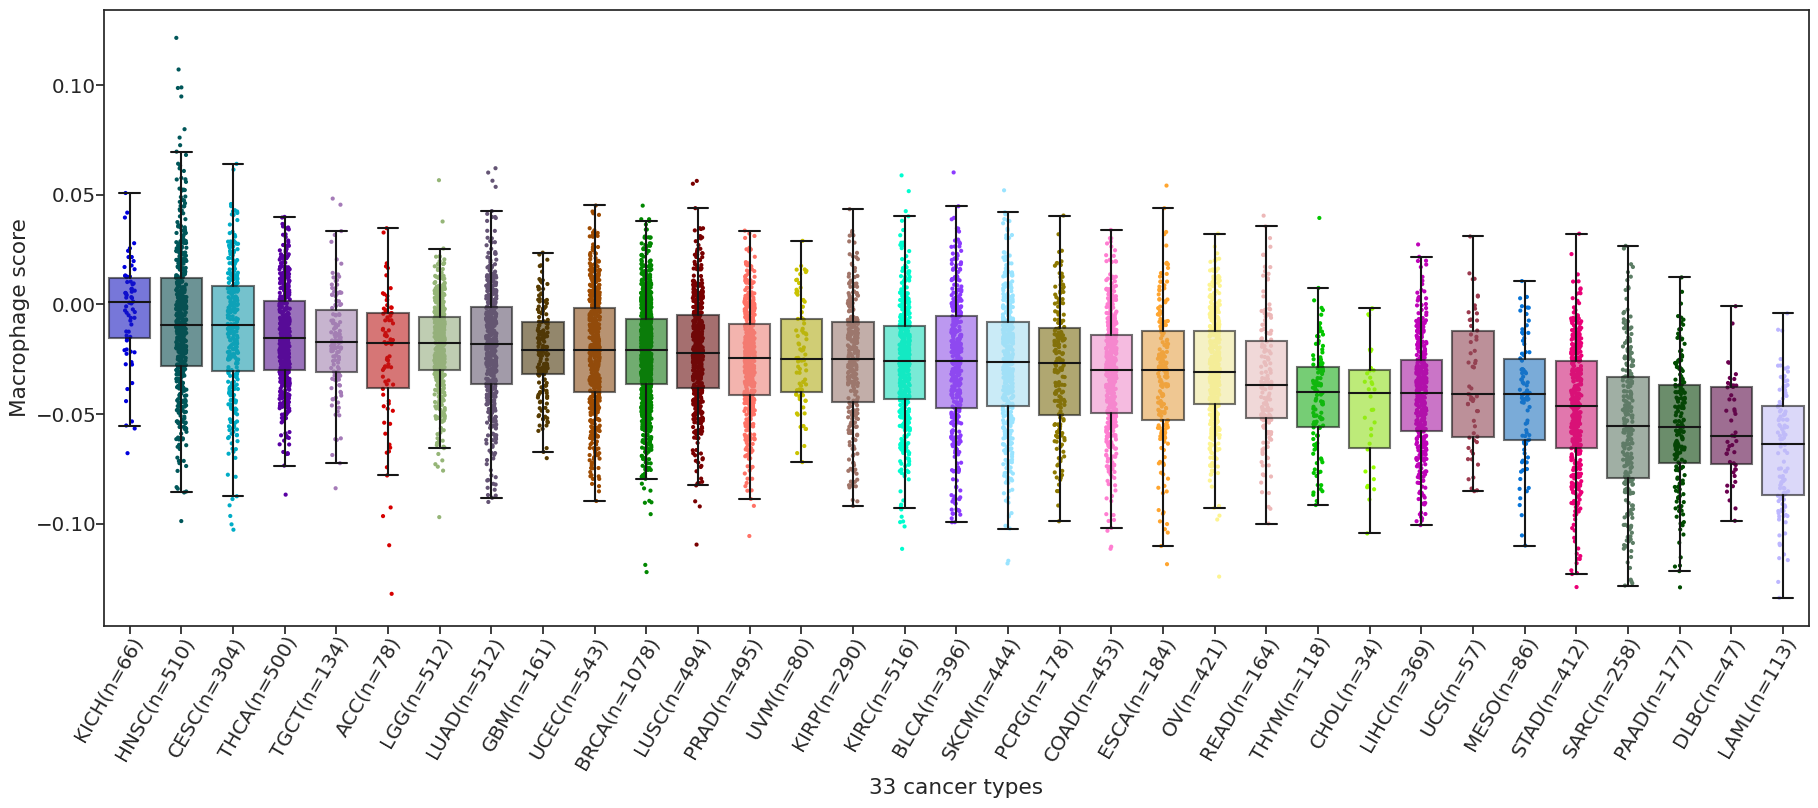

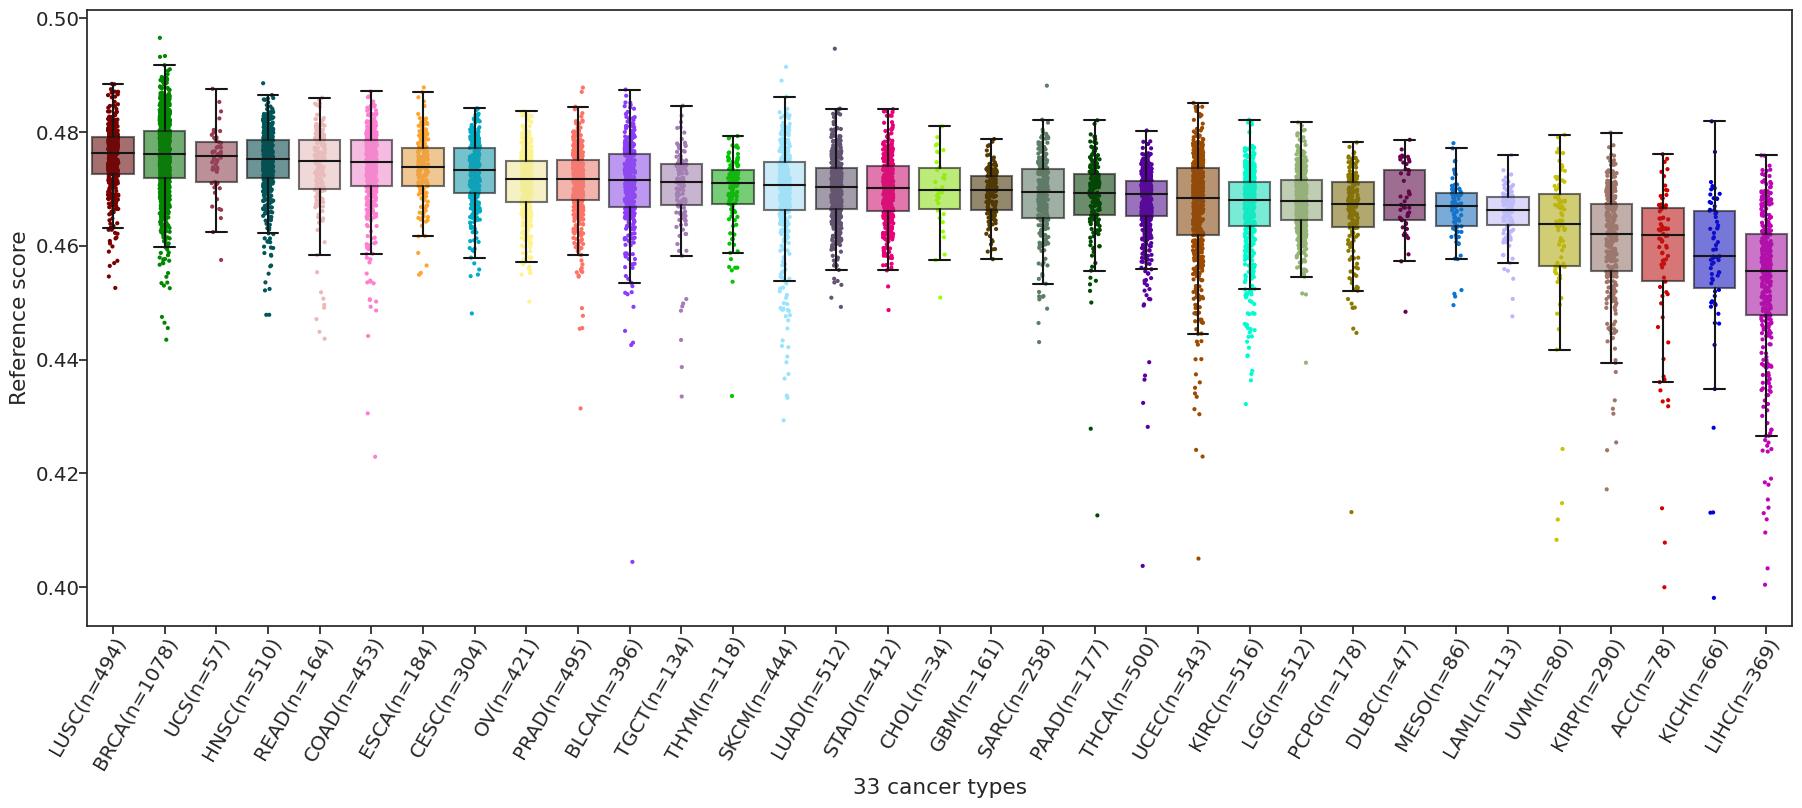

In [64]:
concepts = ['Mast', 'Plasma_cell', 'Cytotoxic_Tcell', 'Macrophage', 'Reference']
x = 'cancer_type'



for y in concepts:    
    data = tcga[[x, y]]
    data['cancer_type'] = data['cancer_type'].map(size)
    
    data = data.sort_values([x, y ])
    cancer_order = data.groupby(x)[y].median().sort_values(ascending=False).index
    cancer_color = pd.Series(cancer_color_map).loc[cancer_order].tolist()
    
    fig, ax = plt.subplots(figsize=(22, 8))
    sns.boxplot(data, x = x, y = y, fliersize = 0, order = cancer_order,  palette= cancer_color, boxprops={'alpha':0.6})
    sns.stripplot(data, x = x, y = y, order = cancer_order,  palette = cancer_color, size = 3, edgecolor='k', zorder=0) #, hue = 'cancer_type'
    
    ax.set_ylabel('%s readout' % y)
    ax.set_xlabel('Cancer type')
    ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
    ax.set_xticklabels(cancer_order, 
                        rotation=60, 
                        ha="right",  
                        rotation_mode="anchor")  # <====== HERE is the ke
    
    fig.savefig('Concept_TCGA_%s.pdf' % y, bbox_inches ='tight')

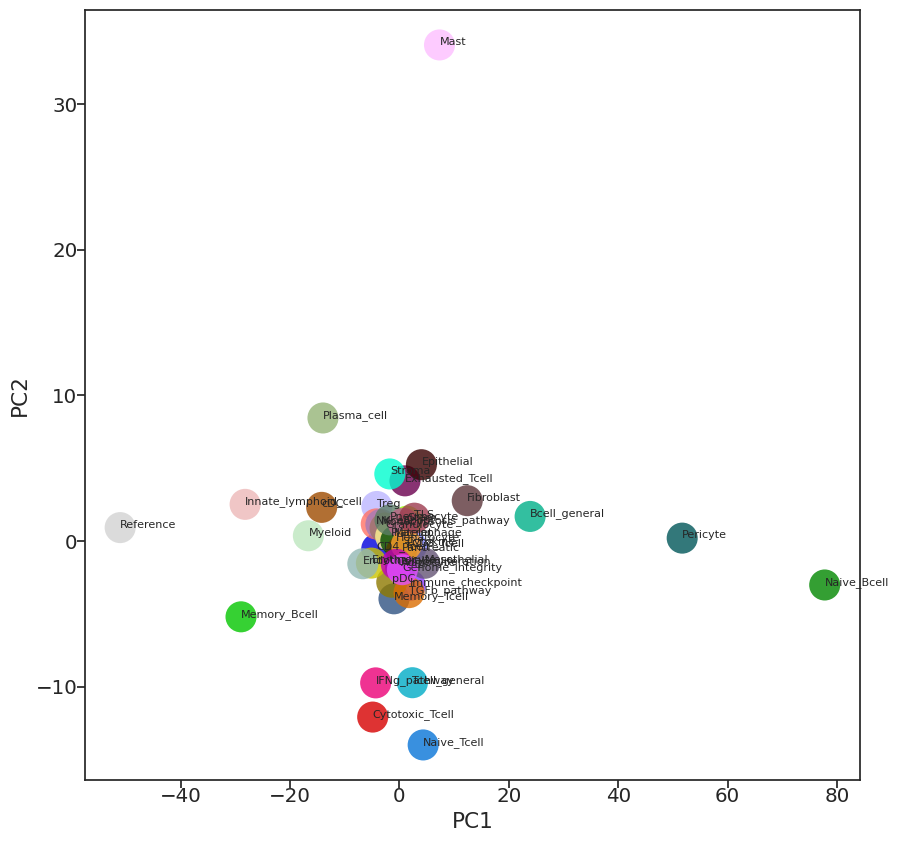

In [13]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
data = tcga[hue_order]
mp = PCA(n_components = 2)
c2d = mp.fit_transform(data.T)
df2d  = pd.DataFrame(c2d, index=data.columns, columns = ['x', 'y'])
df2d['c'] = df2d.index
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'c',  alpha = 0.8, linewidth=0.0, s = 500,
                hue_order = hue_order, palette=hue_color, ax=ax, legend=False)

for name in df2d.index:
    s = df2d.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':8})

ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

#fig.savefig('Score_TCGA_Cell_concept_PCA.pdf' ,bbox_inches ='tight')

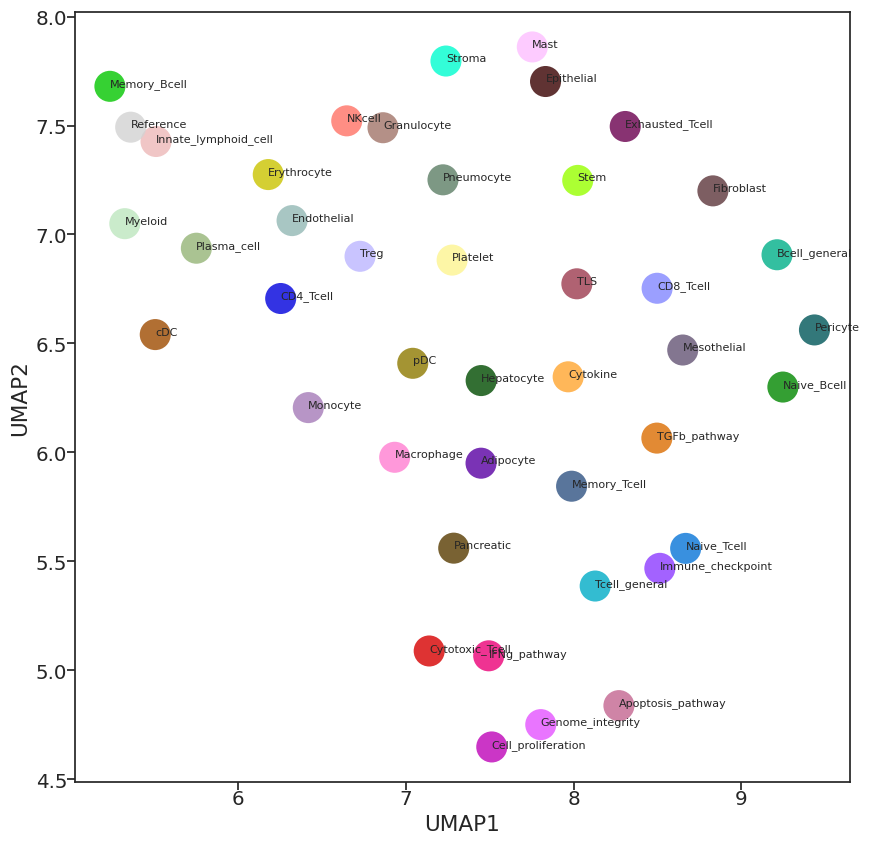

In [14]:
data = tcga[hue_order]
mp = UMAP(n_components = 2)
c2d = mp.fit_transform(data.T)
df2d  = pd.DataFrame(c2d, index=data.columns, columns = ['x', 'y'])
df2d['c'] = df2d.index
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'c',  alpha = 0.8, linewidth=0.0, s = 500,
                hue_order = hue_order, palette=hue_color, ax=ax, legend=False)

for name in df2d.index:
    s = df2d.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':8})


ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')

#fig.savefig('Score_TCGA_Cell_concept_UMAP.pdf' ,bbox_inches ='tight')